<a href="https://colab.research.google.com/github/sumitgaikwad8877/Online_retail_customer_segmentation/blob/main/Online_retail_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>Problem Description<b>
In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.


##<b>Business Objective:
Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

Customer segmentation has the potential to allow marketers to address each customer in the most effective way. Using the large amount of data available on customers (and potential customers), a customer segmentation analysis allows marketers to identify discrete groups of customers with a high degree of accuracy based on demographic, behavioral and other indicators.

In [95]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

from datetime import datetime
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import k_means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# Read the dataset 'Online retail'.
df = pd.read_excel('/content/drive/MyDrive/data/Online Retail (1).xlsx')

In [98]:
# Extracting top 5 record or rows from our dataframe, to have a overview of our data.

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [99]:
# Extracting bottom 5 record from our dataframe.
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [100]:
# Shape of dataset.
df.shape

(541909, 8)

In [101]:
# Get all the features of dataset
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [102]:
# View the description of the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### We got to know that our dataset consist 541909 Row's and 8 Column's.

## <B>Feature Discription <B>
* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* Country: Country name. Nominal, the name of the country where each customer resides.

In [103]:
# Check all the information summary of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [104]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [105]:
# Check the uunique values
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## <B>Data Preprocessing

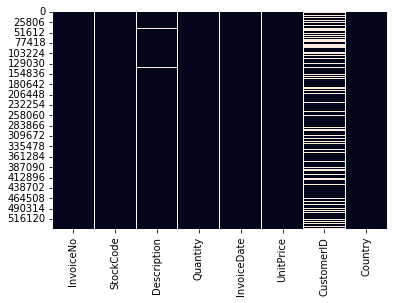

In [106]:
# Plotting the null values on heatmap
sns.heatmap(df.isnull(), cbar = False)


 It is evident from above plot that there are some null values in features Description and CustomerID.

In [107]:
#  Drop the null value
df.dropna(inplace = True)


In [108]:
# check the information summary after dropping null values
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [109]:
df.shape

(406829, 8)

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


 After removing all the null values the observation in our dataset redces to (406829, 8)

In [111]:
# Check duplicate values in our dataset
len(df[df.duplicated()])

5225

We can see that there are 5225 duplicate values in our dataset.

In [112]:
# views the duplicate values in our dataset

df[df.duplicated()]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [113]:
# drop the duplicate values from the datase
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


After dropping the duplicate values the shape of the dataset changes to(401604, 8)

# We also need to drop some InvoiceNo which starts with 'c' as it indicates cancellation.


In [114]:
# check the InviceNo that starts with c
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [115]:
df = df[~df['InvoiceNo'].str.contains('C')]
df.shape

(397924, 8)

## **`FEATURE ENGINNERING`**

In [116]:
# Converting Invoicce date to date time format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%y %H-%M")

In [117]:
df['year'] = df['InvoiceDate'].apply(lambda x: x.year)
df['month_num'] = df['InvoiceDate'].apply(lambda x: x.month)
df['day'] = df['InvoiceDate'].apply(lambda x: x.day)
df['hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['minute'] = df['InvoiceDate'].apply(lambda x: x.minute)

In [118]:
# Extracting month from InvoiceDate.
df['month'] = df['InvoiceDate'].dt.month_name()

In [119]:
# Extracting day from InvoiceDate.
df['day'] = df['InvoiceDate'].dt.day_name()

In [120]:
df['total_amount'] = df['Quantity'] * df['UnitPrice']

In [121]:
df.shape

(397924, 15)

In [122]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day',
       'hour', 'minute', 'month', 'total_amount'],
      dtype='object')

## <b>Exploratory Data Analysis(EDA)

In [123]:
#  view Top 10 products
Top_10_products = df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name', 'Description':'Count'}).head(10)
Top_10_products

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


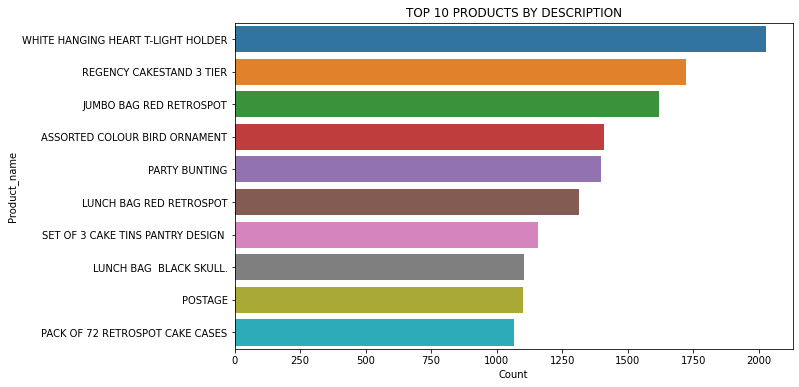

In [124]:
# Top 10 products in terms of description.
plt.figure(figsize=(10,6))
sns.barplot(y=Top_10_products['Product_name'], x=Top_10_products['Count'])
plt.title('TOP 10 PRODUCTS BY DESCRIPTION')
plt.show()

**OBSERVATION-**
* White hanging T-Light holder is most selling product which has almost 2018 unit sold.
* Regency Cakestand 3 Tier is 2nd most sold product after the white hanging t-light holder.

In [125]:
# Lets check the unique id of the customer
df['CustomerID'].nunique()

4339

In [126]:
# Most active customers
active_customers = pd.DataFrame(df['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
active_customers.rename(columns = {'index':'CustomerID', 'CustomerID':'Count'},inplace = True)
active_customers

,CustomerID,Count
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700
...,...,...
4334,15802.0,1
4335,15510.0,1
4336,13366.0,1
4337,18068.0,1


Text(0, 0.5, 'Count')

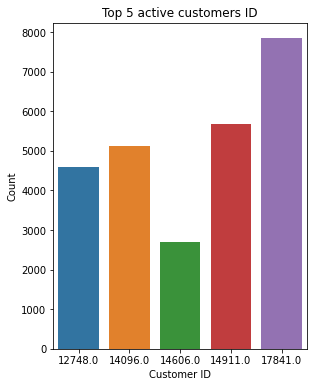

In [127]:
# Now lets plot the top 5 customers
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

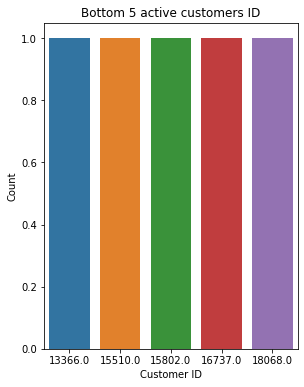

In [128]:
# Bottom 5 customer id
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
sns.barplot(active_customers['CustomerID'][-5:],active_customers['Count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

In [129]:
# top 10 Customer  frquency purchesing
Top_10 =df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Count'}).head(10)
Top_10

,CustomerID,Count
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700
5,15311.0,2379
6,14646.0,2080
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


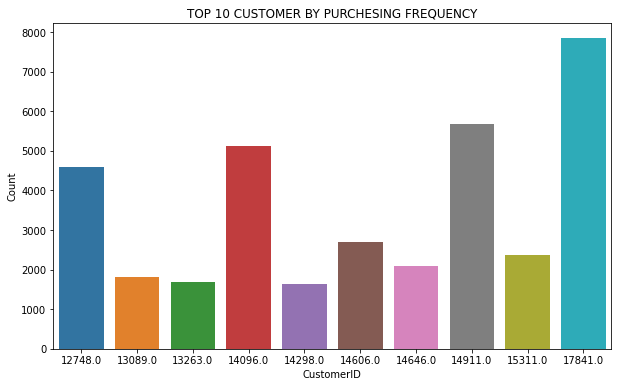

In [130]:
# Visualizing Top 10 Customer by their frquency of purchesing.
plt.figure(figsize=(10,6))
sns.barplot(y=Top_10['Count'],x=Top_10['CustomerID'])
plt.title('TOP 10 CUSTOMER BY PURCHESING FREQUENCY')
plt.show()


**OBSERVATION-**
* CustomerID-17841 has bought most products.
* .CustomerID-14911 has bought 2nd highest products.

In [131]:
# top 5 Country highest sell
Top5_countries = df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Count'})
Top5_countries

,Country,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485
5,Netherlands,2363
6,Belgium,2031
7,Switzerland,1842
8,Portugal,1462
9,Australia,1185


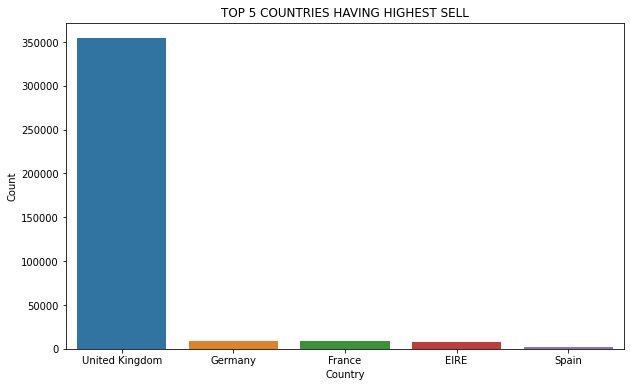

In [132]:
# Visualizing the Top 5 Countries wich has highest sell.
plt.figure(figsize=(10,6))
sns.barplot(x=Top5_countries['Country'].head(5),y=Top5_countries['Count'].head(5))
plt.title('TOP 5 COUNTRIES HAVING HIGHEST SELL')
plt.show()

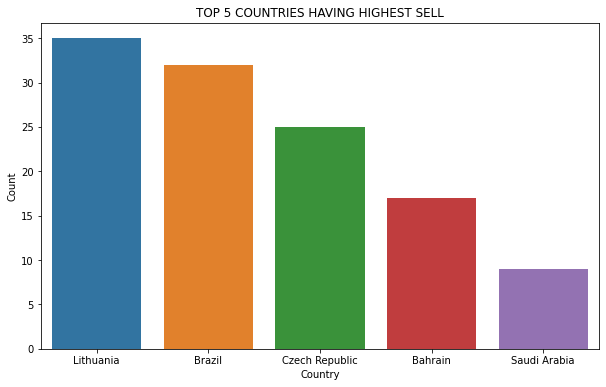

In [133]:
# Visualizing the Top 5 countries which has least no of customers.
plt.figure(figsize=(10,6))
sns.barplot(x=Top5_countries['Country'].tail(5),y=Top5_countries['Count'].tail(5))
plt.title('TOP 5 COUNTRIES HAVING HIGHEST SELL')
plt.show()

**OBSERVATION-**
* The country United Kingdom has the highest number of customer, which is preety obvious as per statement out data is mainly UK based data.
* On the other hand Saudi Arabia has least number of customers or low sell.

## <b>Analysis of categorical features

In [134]:
# Analyze categorical features
categorical_columns = list(df.select_dtypes(['object']).columns)
categorical_features = pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country', 'day', 'month'], dtype='object')

In [135]:
# View the Invoiceno counts
df['InvoiceNo'].value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
561657      1
546775      1
546827      1
546828      1
565975      1
Name: InvoiceNo, Length: 18536, dtype: int64

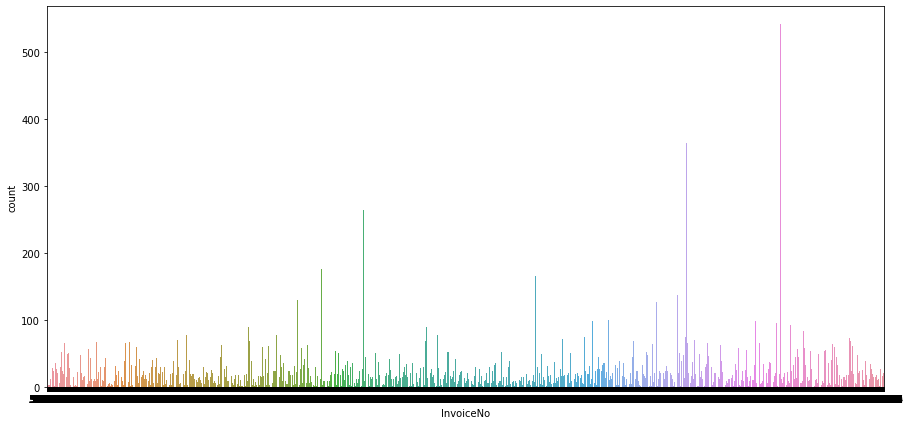

In [136]:
# Plot the invoice count
plt.figure(figsize=(15,7))
sns.countplot(x = 'InvoiceNo', data = df)

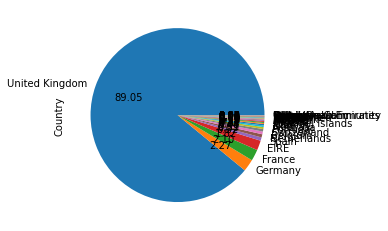

In [137]:
# all Country show in pie chart
df['Country'].value_counts().plot(kind='pie',autopct='%.2f')

## <b>StockCode

In [138]:
# Create a variable and count the stockcode
stockcode_df = df['StockCode'].value_counts().reset_index()
stockcode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
stockcode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
stockcode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


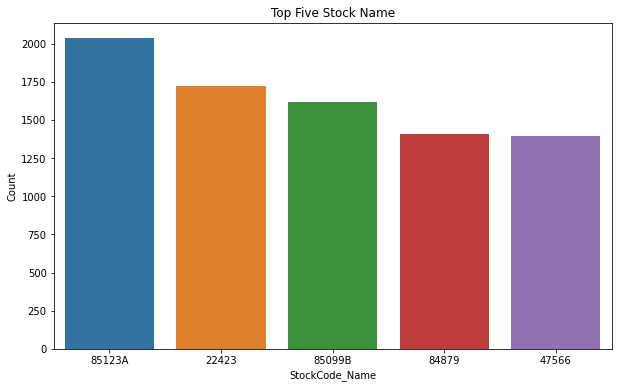

In [139]:
# Plot top 5 stock name
plt.figure(figsize=(10,6))
plt.title('Top Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[:5])


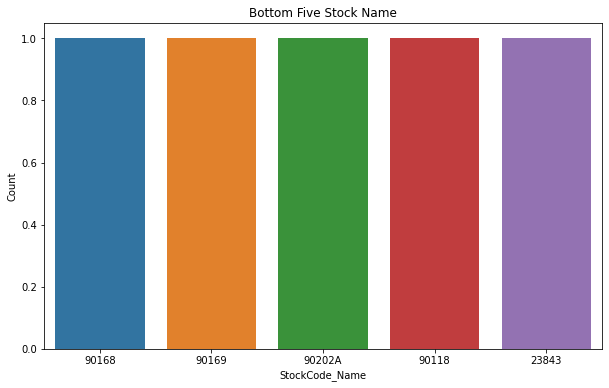

In [140]:
# Plot bottom 5 stock name
plt.figure(figsize=(10,6))
plt.title('Bottom Five Stock Name')
sns.barplot(x = 'StockCode_Name', y= 'Count', data = stockcode_df[-5:])


##<b>Analyzing all Numerical Features

In [141]:
 # Assigning numerical columns to variables
numerical_columns = list(df.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features


Index(['Quantity', 'UnitPrice', 'CustomerID', 'year', 'month_num', 'hour',
       'minute', 'total_amount'],
      dtype='object')

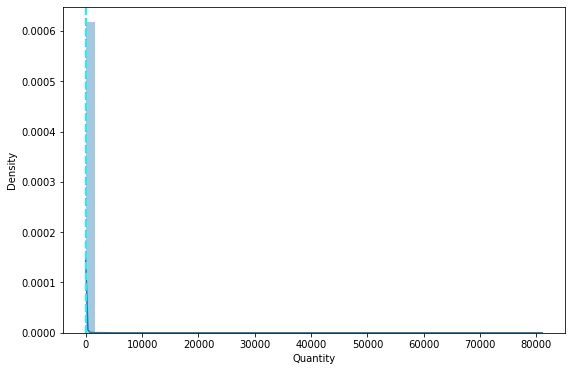

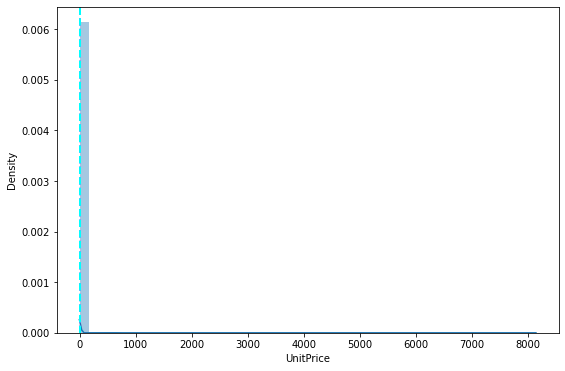

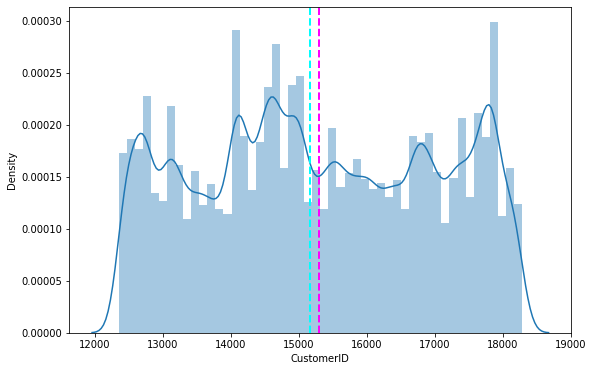

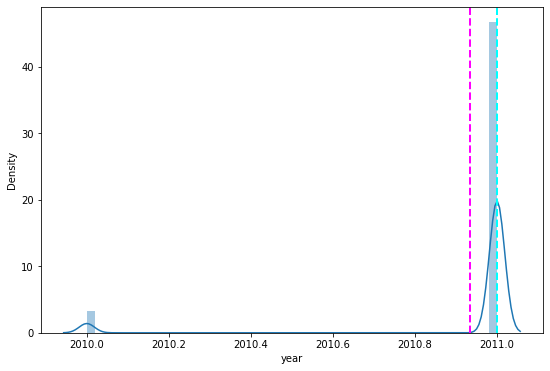

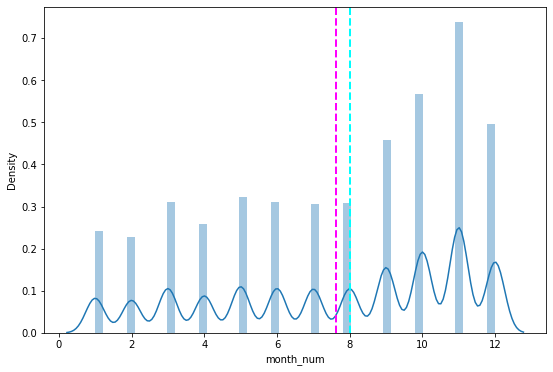

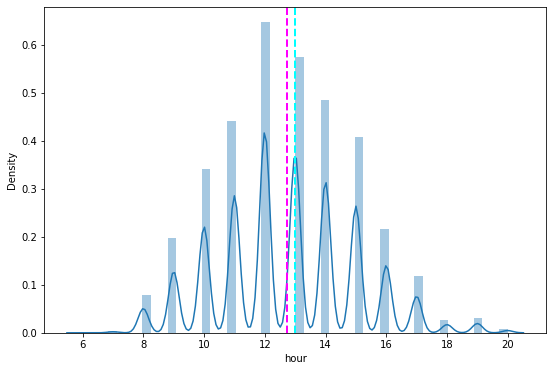

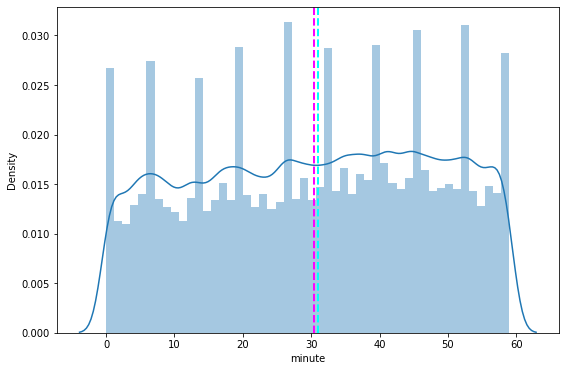

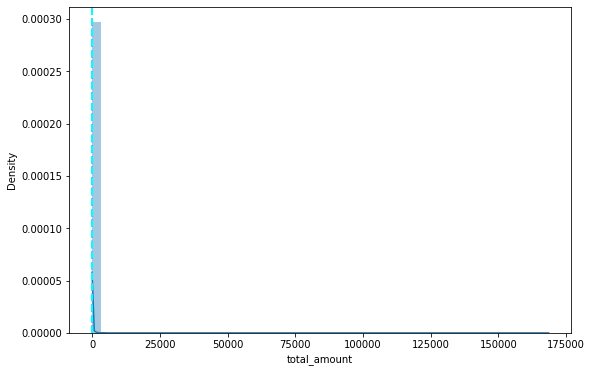

In [142]:
 # Analysing distribution of all numerical variables
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(x=df[col])
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.xlabel(col)
plt.show()

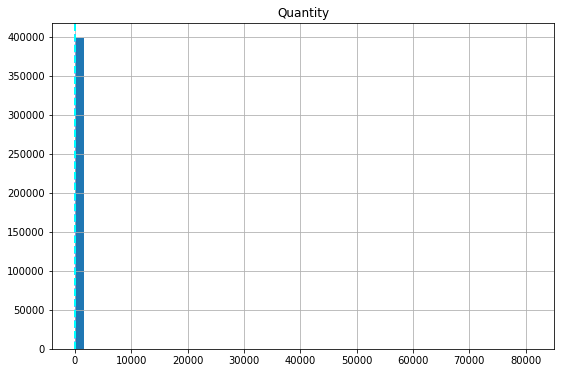

Skewness : 403.31943081039486
Kurtosis : 173965.71516660746


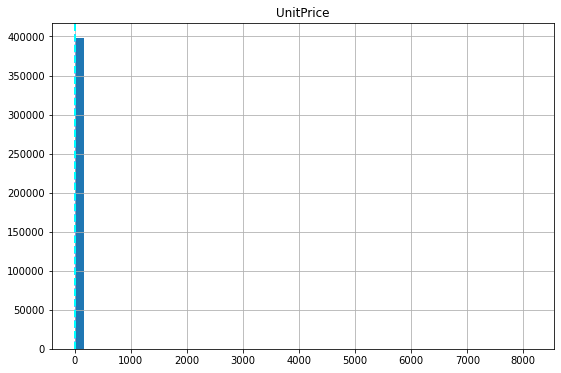

Skewness : 204.04241268899307
Kurtosis : 58146.02091050399


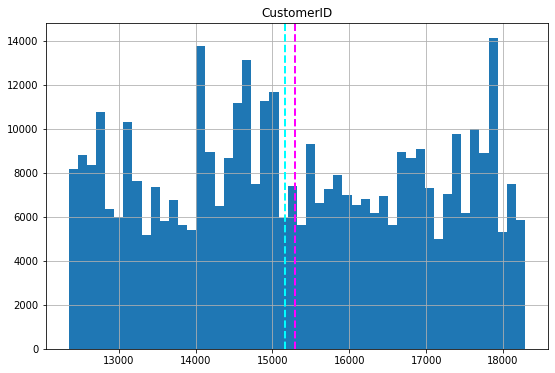

Skewness : 0.02577629847429845
Kurtosis : -1.1808302151571712


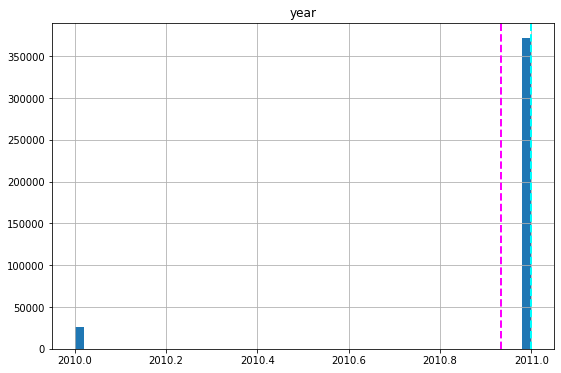

Skewness : -3.5045145019499735
Kurtosis : 10.281673570919017


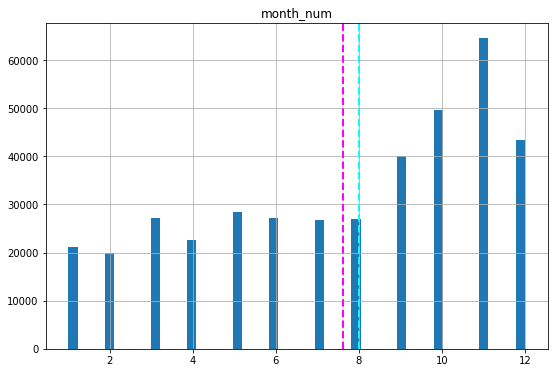

Skewness : -0.4448423572483675
Kurtosis : -1.074460364777609


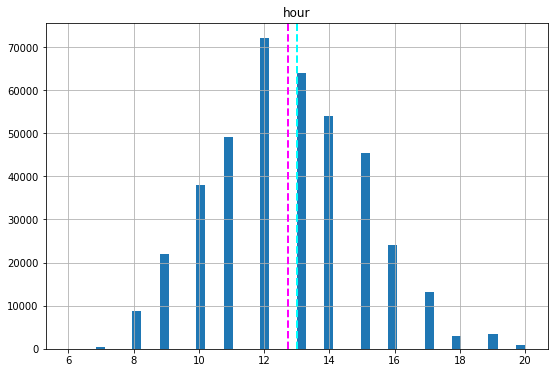

Skewness : 0.18903743045332783
Kurtosis : -0.20968488890482462


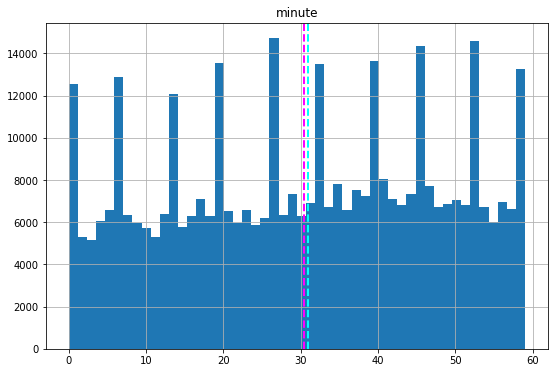

Skewness : -0.08092206133583811
Kurtosis : -1.1655389341755757


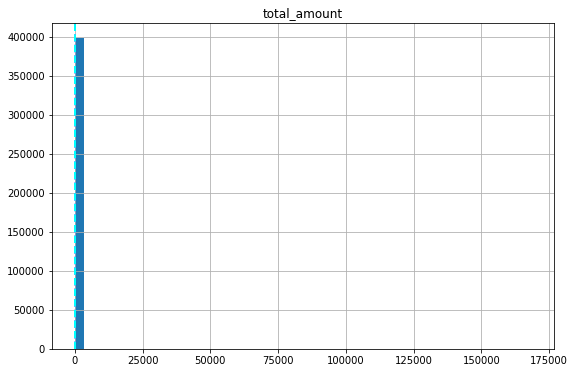

Skewness : 451.465537635017
Kurtosis : 232178.22423598208


In [143]:
# Analyse all numerical feature using histogram
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",df[col].skew())
  print( "Kurtosis :",df[col].kurt())

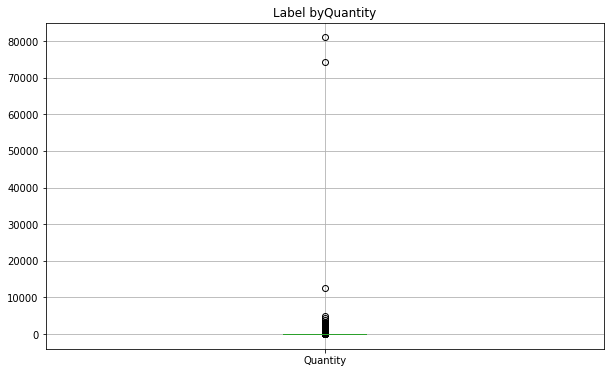

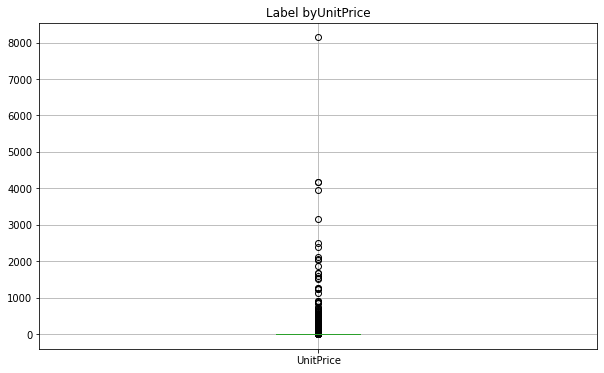

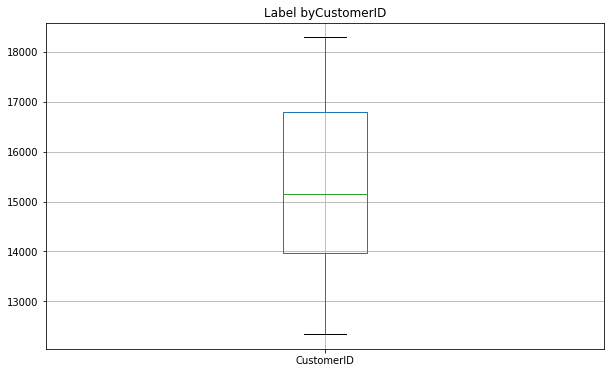

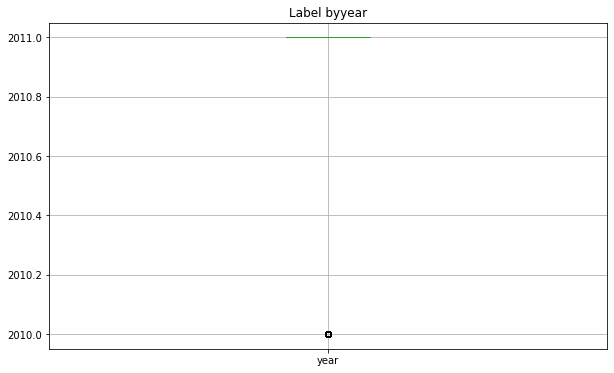

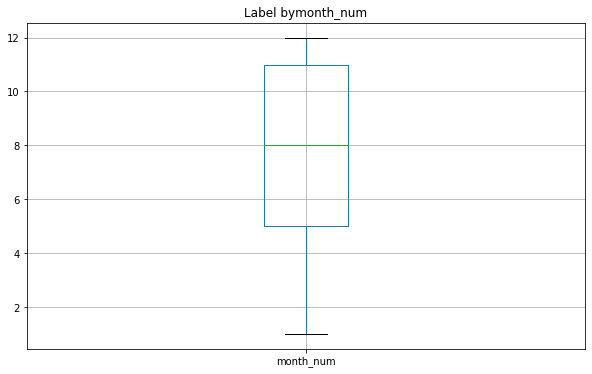

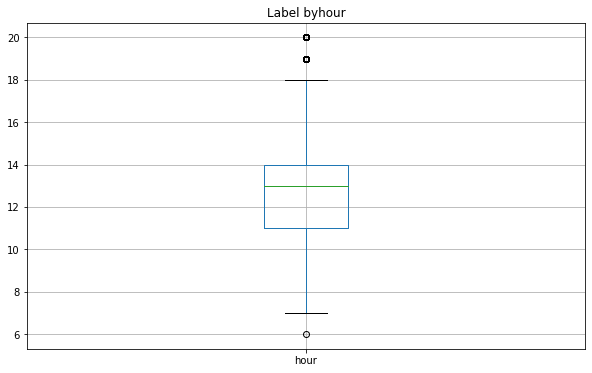

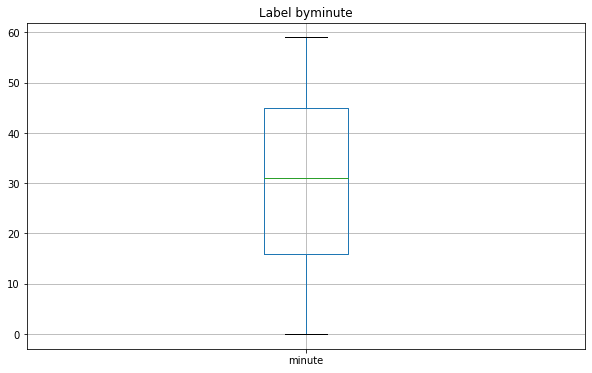

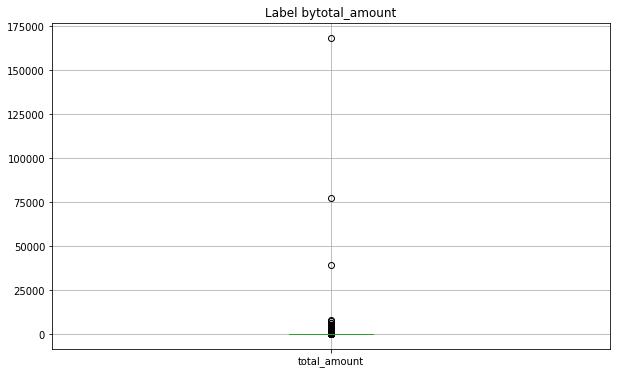

In [144]:
# Plot the box plot for each numerical feature
for col in numerical_features:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  df.boxplot(col)
  ax.set_title("Label by" + col)
plt.show()


## <b>Correlation Matrix

In [145]:
df.corr()

,Quantity,UnitPrice,CustomerID,year,month_num,hour,minute,total_amount
Quantity,1.000000,-0.004561,-0.006411,0.001595,-0.004006,-0.014532,-0.003095,0.908812
UnitPrice,-0.004561,1.000000,-0.010863,-0.000191,-0.005171,-0.000286,-0.000541,0.081646
CustomerID,-0.006411,-0.010863,1.000000,-0.036352,0.030417,0.065852,-0.026865,-0.004104
year,0.001595,-0.000191,-0.036352,1.000000,-0.340655,-0.019763,0.000424,0.000431
month_num,-0.004006,-0.005171,0.030417,-0.340655,1.000000,0.058213,0.008339,-0.002733
hour,-0.014532,-0.000286,0.065852,-0.019763,0.058213,1.000000,-0.122545,-0.013209
minute,-0.003095,-0.000541,-0.026865,0.000424,0.008339,-0.122545,1.000000,-0.002569
total_amount,0.908812,0.081646,-0.004104,0.000431,-0.002733,-0.013209,-0.002569,1.000000


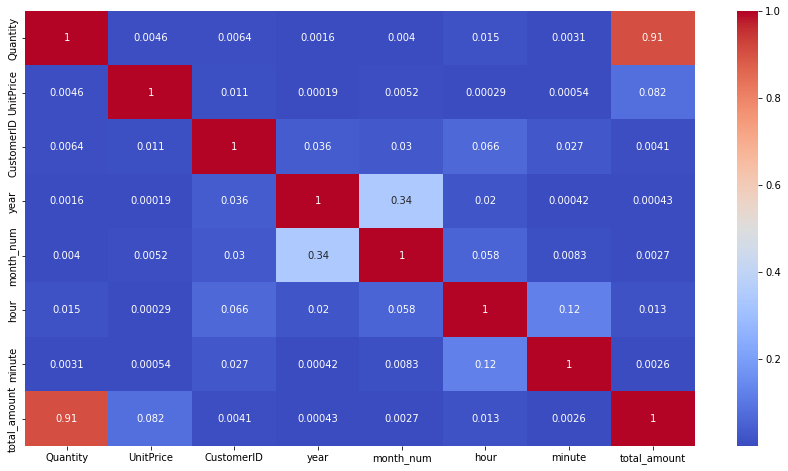

In [146]:
# Plot heatmap to show correlation of different variables
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")


In [147]:
Sale_in_month = df['month'].value_counts().reset_index().rename(columns={'index':'month','month':'count'})
Sale_in_month

,month,count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


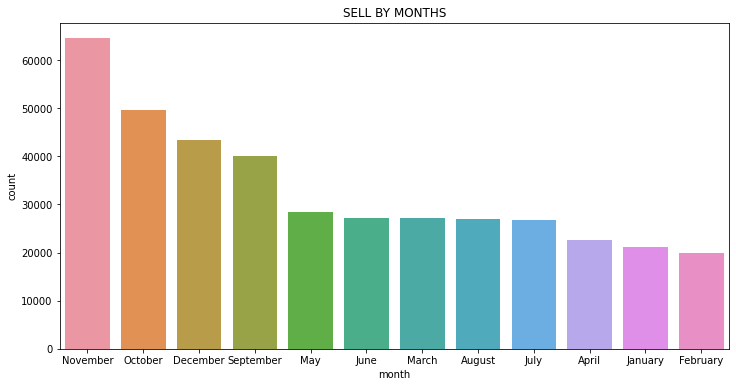

In [148]:
# Visualizing the sale by month.
plt.figure(figsize=(12,6))
sns.barplot(x=Sale_in_month['month'],y=Sale_in_month['count'].sort_values())
plt.title('SELL BY MONTHS')
plt.show()

**OBSERVATION-**
* In month of november the sale was very high.
* But at same time in month of february the sale was very low.

In [149]:
sales_on_day = df['day'].value_counts().reset_index().rename(columns={'index':'day','day':'count'})
sales_on_day

,day,count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


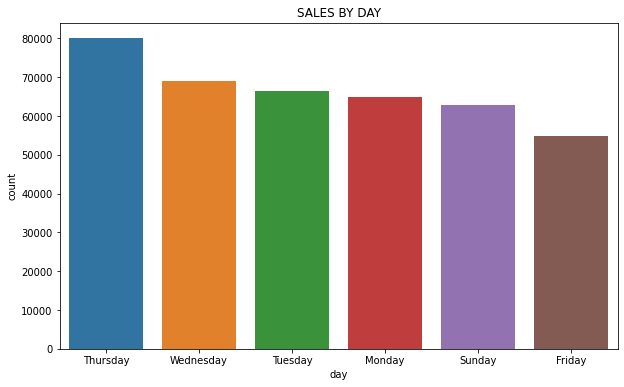

In [150]:
# lets see the sale on day basis.
plt.figure(figsize=(10,6))
sns.barplot(x=sales_on_day['day'],y=sales_on_day['count'])
plt.title('SALES BY DAY')
plt.show()

**OBSERVATION-**
* The highest count of sales occured on the Thursday, and sale at other day are significantly equal amount.

In [151]:
sales_on_day = df['day'].value_counts().reset_index().rename(columns={'index':'day','day':'count'})
sales_on_day

,day,count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


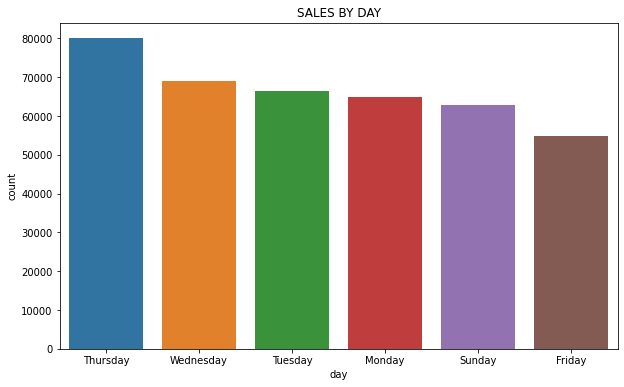

In [152]:
# lets see the sale on day basis.
plt.figure(figsize=(10,6))
sns.barplot(x=sales_on_day['day'],y=sales_on_day['count'])
plt.title('SALES BY DAY')
plt.show()

**OBSERVATION-**
* The highest count of sales occured on the Thursday, and sale at other day are significantly equal amount.

In [153]:
df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6])

In [154]:
def time(time):
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'

  else:
    return 'Evening'

In [155]:
df['day_time'] = df['hour'].apply(time)
sale_by_day_timming = df['day_time'].value_counts().reset_index().rename(columns={'index':'day_time','day_time':'count'})
sale_by_day_timming

,day_time,count
0,Afternoon,272764
1,Morning,118107
2,Evening,7053


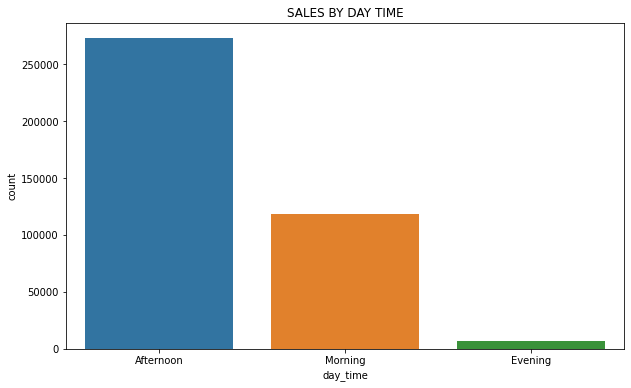

In [156]:
# Lets see the the count of sale on day time i.e 'Morning', 'Afternoon', 'Evening'.
plt.figure(figsize=(10,6))
sns.barplot(x=sale_by_day_timming['day_time'],y=sale_by_day_timming['count'])
plt.title('SALES BY DAY TIME')
plt.show()

**OBSERVATION-**
* At Afternoon session sale count is comparetivly high than Morning and Evening sessions.

In [157]:
# Avarage cost of expenditure by each customer.
avg_cost = df.groupby('CustomerID')['total_amount'].mean().reset_index().rename(columns={'total_amount':'avg_cost'}).sort_values('avg_cost',ascending=False)
avg_cost

,CustomerID,avg_cost
0,12346.0,77183.600000
3009,16446.0,56157.500000
2012,15098.0,13305.500000
2503,15749.0,4453.430000
2088,15195.0,3861.000000
...,...,...
698,13271.0,2.264375
991,13684.0,2.241000
3996,17816.0,2.150588
2316,15503.0,2.101286


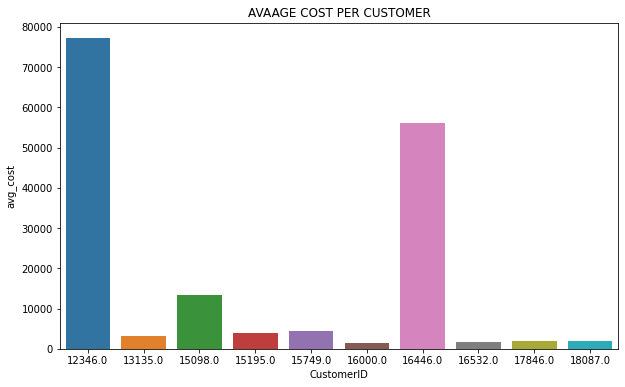

In [158]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_cost['CustomerID'].head(10),y=avg_cost['avg_cost'].head(10))
plt.title('AVAAGE COST PER CUSTOMER')
plt.show()

**OBSERVATION-**
* 77183 Is the highest avg cost spent by customer 12346.
* 56157 Is the second highest avg cost spent by customer 16446.

## <b>Creating Recency, Frequency and Monetary(RFM) Model

Before applying any clustering algorithms it is always necessary to determine various quantitative factors on which the algorithm will perform segmentation. Examples of these would be features such as amount spend, activeness of the customer, their last visit, etc.

 * RFM model which stands for Recency, Frequency, and Monetary is one of such steps in which we determine the recency - days to last visit, frequency - how actively the customer repurchases and monetary - total expenditure of the customer, for each customer. There are other steps too in which we divide each of these features accordingly and calculate a score for each customer. However, this approach doesnot require machine learning algorithms as segmentation can be done manually. Therefore we will skip the second step and directly use the rfm features and feed it to clustering algorithms.

* Recency = Latest Date - Last Inovice Data
* Frequency = count of invoice no. of transaction(s)
* Monetary = Sum of Total Amount for each customer

In [159]:
# Set Latest date 2011-12-10 as last invoice date was 2011-12-09
#This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)


In [160]:
import datetime as dt 

# Set latest date = 2011-12-10 as Invoice date 2011-12-09, This is to calculate days from recent purchase.
latest_date = dt.datetime(2011,12,10)

# RFM Modelling score for each customer.
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'total_amount': lambda x: x.sum()})

# Coverting InvoiceDate in type int.
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# Rename column name into Recency, Frequency, Monetry.
rfm_df.rename(columns={'InvoiceDate':'Recency',
                       'InvoiceNo':'Frequency',
                       'total_amount':'Monetry'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetry
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [161]:
# Descriptive Staistics
rfm_df['Recency'].describe()


count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

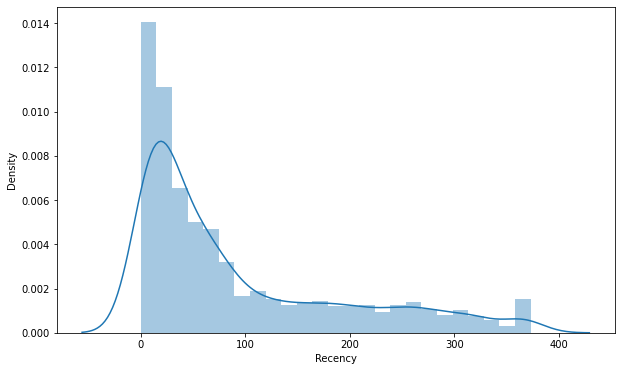

In [162]:
# Recency Distribution Plot
x = rfm_df['Recency']
plt.figure(figsize=(10,6))
sns.distplot(x)


In [163]:
# Desriptive Statistics (Frequency)
rfm_df['Frequency'].describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

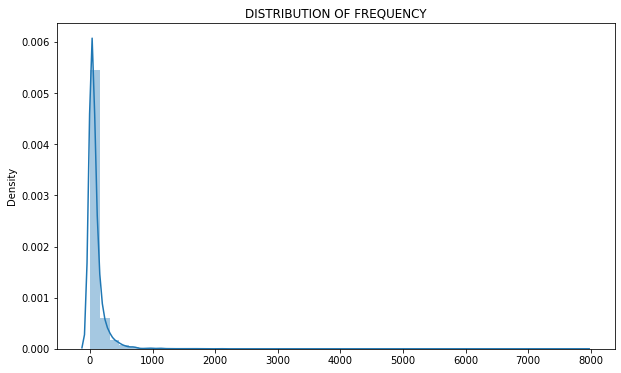

In [164]:
plt.figure(figsize=(10,6))
sns.distplot(x=rfm_df['Frequency'])
plt.title('DISTRIBUTION OF FREQUENCY')
plt.show()

In [165]:
# Descriptive Staistics (Monetray)
rfm_df['Monetry'].describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetry, dtype: float64

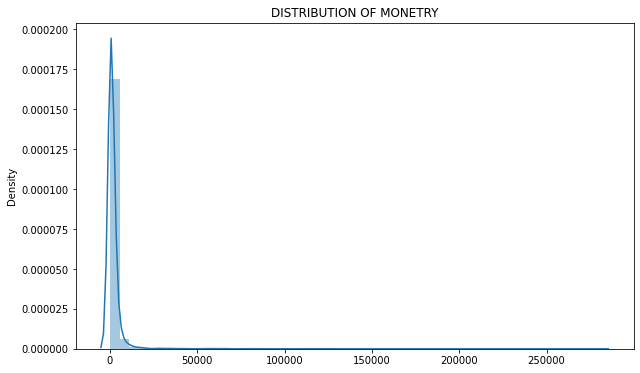

In [166]:
plt.figure(figsize=(10,6))
sns.distplot(x=rfm_df['Monetry'])
plt.title('DISTRIBUTION OF MONETRY')
plt.show()

##Split into four segments using Quantiles

In [167]:
# Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles                           


{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetry': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [168]:
# Lets create the fuction of segment R, F and M.
# Note- Higher the recency good for business.
# x= value, p= (Reccency, Frequency, Monetry), d= dictonary of quantile.


def Rscoring(x,p,d):
  if x <=d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4
# Higher value of recency should be 1.


def FnMscoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.50]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1
# Higher value of frequency and monetery should be 4.

In [169]:
# Adding R, F, M segment to dataset.
rfm_df['R'] = rfm_df['Recency'].apply(Rscoring, args=('Recency',quantiles))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMscoring, args=('Frequency',quantiles))
rfm_df['M'] = rfm_df['Monetry'].apply(FnMscoring, args=('Monetry',quantiles))

rfm_df.head()

,Recency,Frequency,Monetry,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [170]:
# Creating new column of RFM Group.
rfm_df['RFM'] = rfm_df.R.map(str)+rfm_df.F.map(str)+rfm_df.M.map(str)

In [171]:
# Calculate RFMscore value and add column showing total sum of RFM group value.
rfm_df['RFM_Score'] = rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()

,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [172]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetry    4339 non-null   float64
 3   R          4339 non-null   int64  
 4   F          4339 non-null   int64  
 5   M          4339 non-null   int64  
 6   RFM        4339 non-null   object 
 7   RFM_Score  4339 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.1+ KB


In [173]:
rfm_df['RFM_Score'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

In [174]:
# Encoding loyalty level to each customer.
loyalty_level = ['Platinum','Gold','Silver','Bronz']
score_cut = pd.qcut(rfm_df['RFM_Score'],q=4,labels=loyalty_level)
rfm_df['Loyalty'] = score_cut.values
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score,Loyalty
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronz


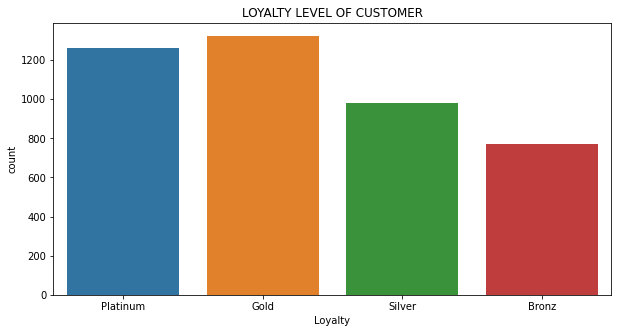

In [175]:
# Plot Loyalty level of customer.
plt.figure(figsize=(10,5))
sns.countplot(rfm_df['Loyalty'])
plt.title('LOYALTY LEVEL OF CUSTOMER')
plt.show()

In [176]:
# Our target customers.
rfm_df[rfm_df['Loyalty'] == 'Platinum'].sort_values('Monetry', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score,Loyalty
0,14646.0,1,2080,280206.02,1,1,1,111,3,Platinum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
3,14911.0,1,5677,143825.06,1,1,1,111,3,Platinum
4,12415.0,24,716,124914.53,2,1,1,211,4,Platinum
5,14156.0,9,1400,117379.63,1,1,1,111,3,Platinum
6,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
7,16029.0,38,242,81024.84,2,1,1,211,4,Platinum
8,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
9,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum


In [177]:
segmentation_based_on_rfm = rfm_df[['Recency','Frequency','Monetry','Loyalty']]

In [178]:
segmentation_based_on_rfm.groupby('Loyalty').agg({'Recency':['mean','min','max'],
                                                  'Frequency':['mean','min','max'],
                                                  'Monetry':['mean','min','max','count']})

Recency            Frequency                Monetry          \
                mean min  max        mean min   max         mean     min   
Loyalty                                                                    
Platinum   19.412510   0  140  228.581948  20  7847  5255.277617  360.93   
Gold       63.376133   0  372   57.966012   1   543  1169.031202  114.34   
Silver    125.915479   1  373   24.481670   1    99   583.342303    0.00   
Bronz     217.261039  51  373   10.957143   1    41   199.159506    3.75   

                           
                max count  
Loyalty                    
Platinum  280206.02  1263  
Gold      168472.50  1324  
Silver     77183.60   982  
Bronz        660.00   770

## <b>Log Transformation

In [179]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
#Apply handle_neg_n_zero function to Recency and Monetary columns 
def hand_neg_zero (num):
  if num <= 0:
    return 1
  else:
    return num

rfm_df['Recency'] = [hand_neg_zero(x) for x in rfm_df.Recency]
rfm_df['Monetry'] = [hand_neg_zero(x) for x in rfm_df.Monetry]

In [180]:
# Performing Log transformation to bring data in normal or near to normal distributon.
Log_rfm_df = rfm_df[['Recency','Frequency','Monetry']].apply(np.log, axis=1).round(2)

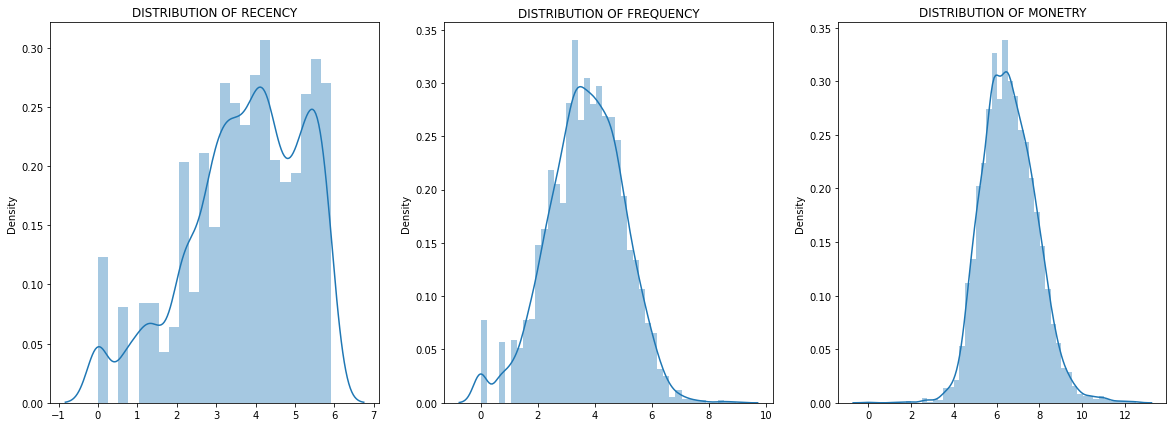

In [181]:
# lets visualize the Distribution of data.
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
sns.distplot(x=Log_rfm_df['Recency'])
plt.title('DISTRIBUTION OF RECENCY')

plt.subplot(1,3,2)
sns.distplot(x=Log_rfm_df['Frequency'])
plt.title('DISTRIBUTION OF FREQUENCY')

plt.subplot(1,3,3)
sns.distplot(x=Log_rfm_df['Monetry'])
plt.title('DISTRIBUTION OF MONETRY')

plt.show()

In [182]:
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetry_log'] = rfm_df['Monetry'].apply(math.log)

In [183]:
rfm_df.head()

,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score,Loyalty,Recency_log,Frequency_log,Monetry_log
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338


In [184]:
rfm_df.shape

(4339, 12)

## <b>K-Means Clsutering Implementation
* It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different.
Calculation of Silhouette Score

* Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters.

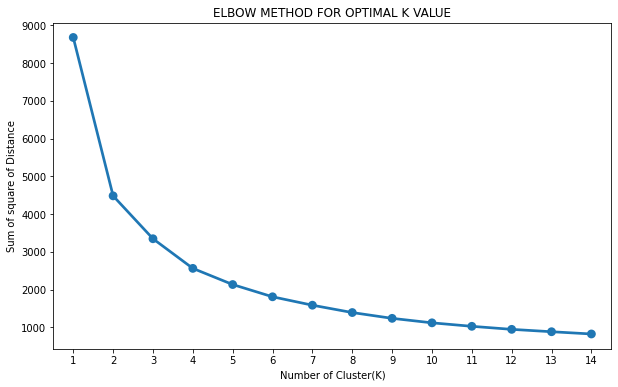

In [185]:
# Recency and Monetry_log in list.
recency_and_monetry_list = ['Recency_log','Monetry_log']

# Taking only recency and monetry values in x.
x = rfm_df[recency_and_monetry_list].values

# Standerdizing the data.
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Applying Elbow method.
wcss = {}
for k in range(1,15):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  km = km.fit(x)
  wcss[k] = km.inertia_

# Plot the graph for sum of square distance value and number of cluster.
plt.figure(figsize=(10,6))
sns.pointplot(x=list(wcss.keys()),y=list(wcss.values()))
plt.xlabel('Number of Cluster(K)')
plt.ylabel('Sum of square of Distance')
plt.title('ELBOW METHOD FOR OPTIMAL K VALUE')
plt.show()

* **OPTIMAL VALUE OF CLUSTER CAME OUT TO BE 2**[link text](https://)

## <B>Elbow Method Implementation

* Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k. Let us see how this elbow method works. It is an empirical method to find out the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.
* When the value of k is 1, the within-cluster sum of the square will be high. As the value of k increases, the within-cluster sum of square value will decrease.
* Finally, we will plot a graph between k-values and the within-cluster sum of the square to get the k value. we will examine the graph carefully. At some point, our graph will decrease abruptly. That point will be considered as a value of k.

In [186]:
# Applying Elbow Method on Recency and Monetary
features_rec_mon=['Recency_log','Monetry_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_


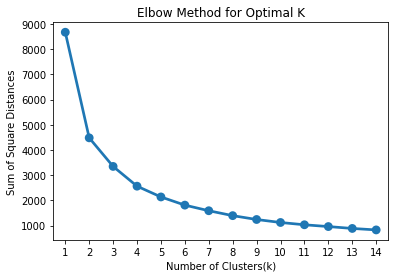

In [187]:
# Plot the graph for the sum of square distance values and number of clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()), y= list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()


## Hyperparameter Tuning For Best Value of K

In [188]:
# Taking number of cluster as 2
kmeans =  KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


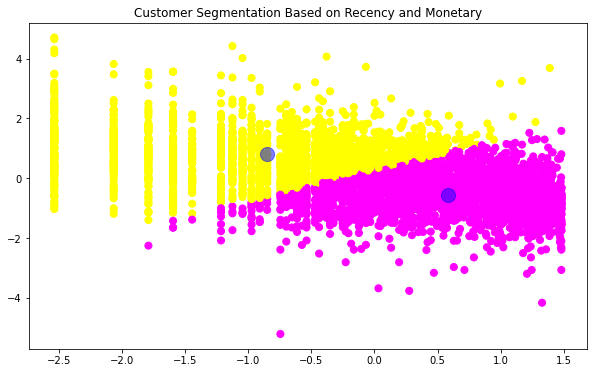

In [189]:
# Plot customer segmentation by taking k=2
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5)



Conclusion: We see that customers are well separated when we cluster them on the basis of Recency and Monetary

## <b> DBSCAN on Frequency and Monetary

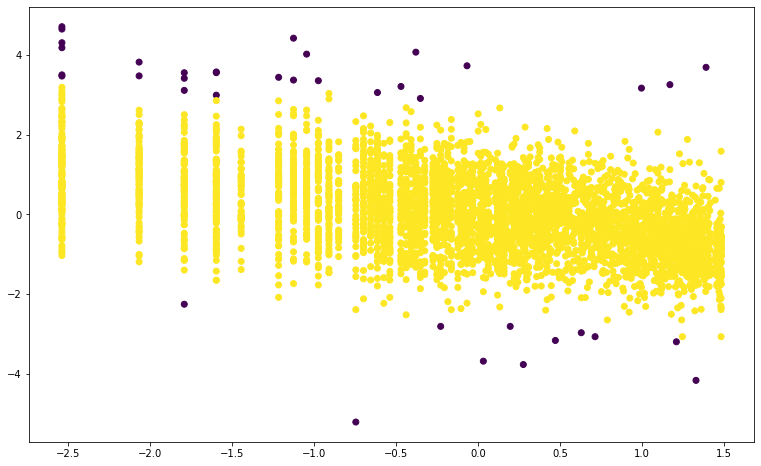

In [190]:
# Applying DBSCAN method on Frequency and Monetary
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)


Conclusion: Customer are well segmented on basis of frequency and monetary



## <b>Comparison between R vs M and F vs M

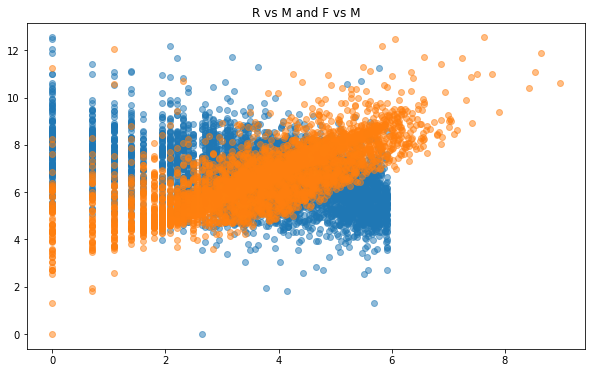

In [191]:
# Plot R vs M and F vs M
plt.figure(figsize=(10,6))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetry_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetry_log,alpha=0.5)

## <b>Applying Silhouette Method on Recency, Frequency and Monetary

In [192]:
# Apply silhouette on RFM
feature_vector = ['Recency_log', 'Frequency_log', 'Monetry_log']
X_features = rfm_df[feature_vector].values
scaler = preprocessing.StandardScaler()
X= scaler.fit_transform(X_features)


For n_clusters = 2 The average silhouette_score is : 0.42101116657624216
For n_clusters = 3 The average silhouette_score is : 0.342843545352207
For n_clusters = 4 The average silhouette_score is : 0.36431591478500835
For n_clusters = 5 The average silhouette_score is : 0.33674903317539934
For n_clusters = 6 The average silhouette_score is : 0.34421514431762534
For n_clusters = 7 The average silhouette_score is : 0.34738037136141997
For n_clusters = 8 The average silhouette_score is : 0.3373928797084938
For n_clusters = 9 The average silhouette_score is : 0.34551637075041824
For n_clusters = 10 The average silhouette_score is : 0.34826185975167395


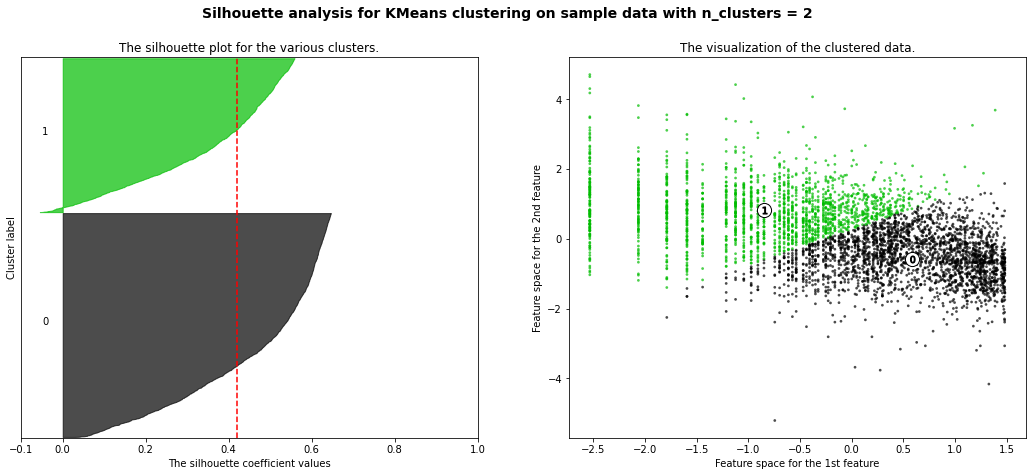

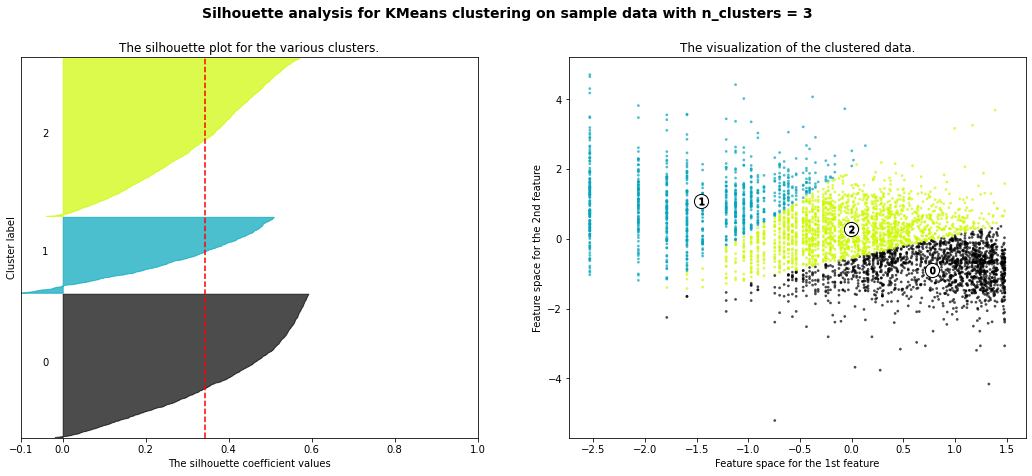

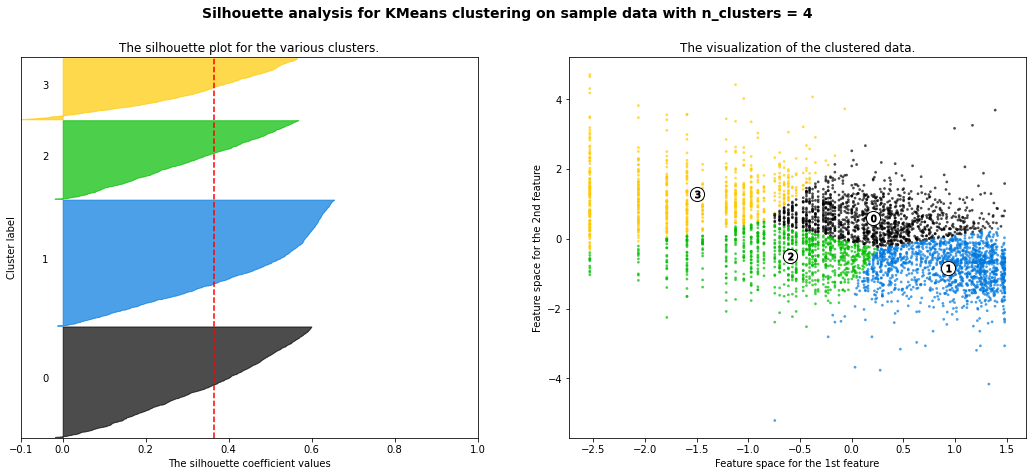

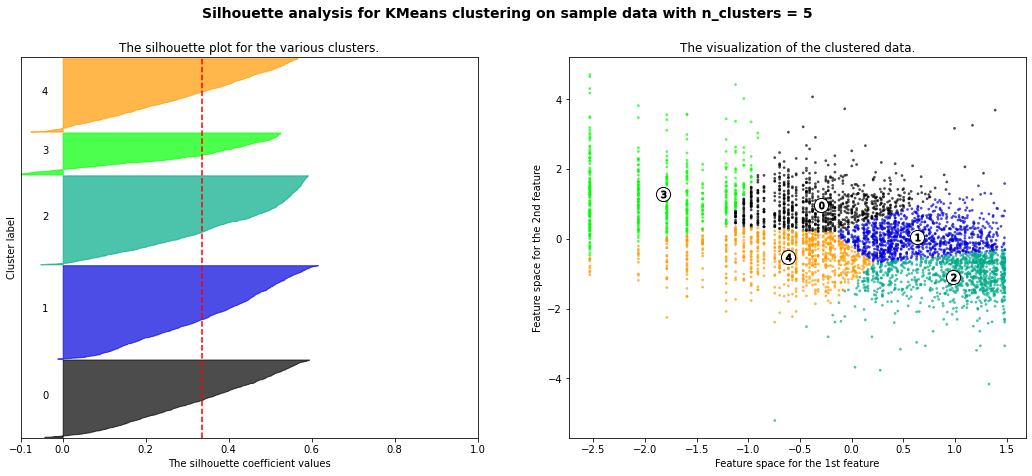

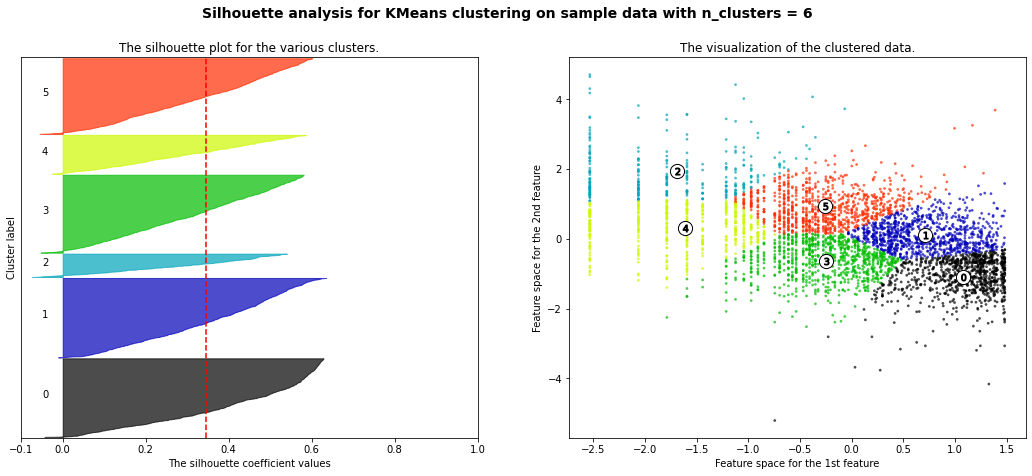

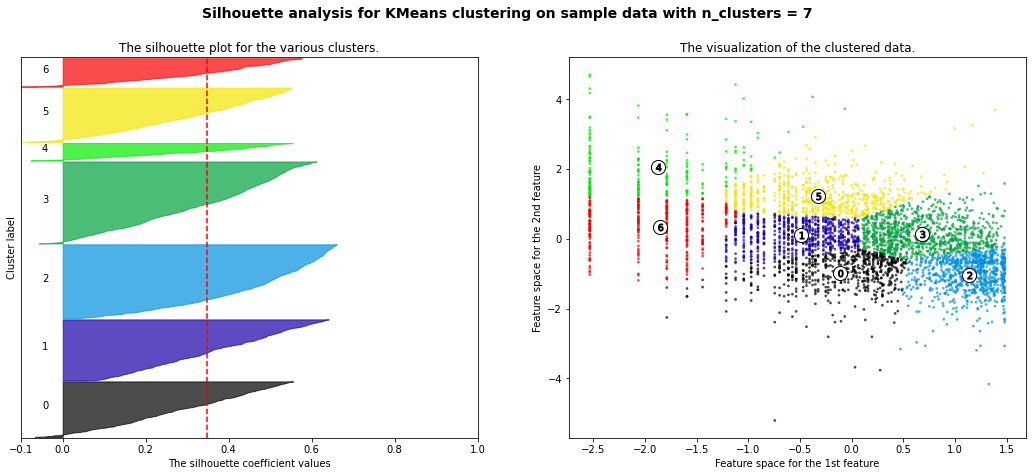

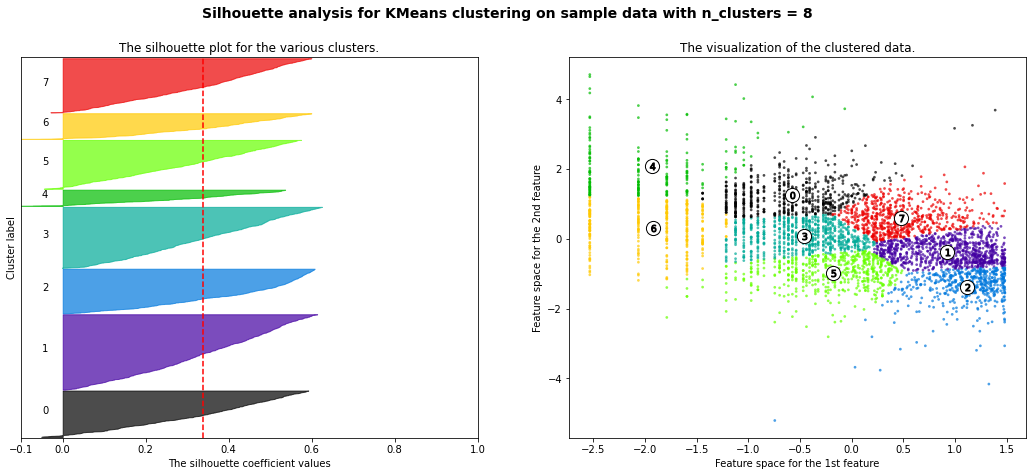

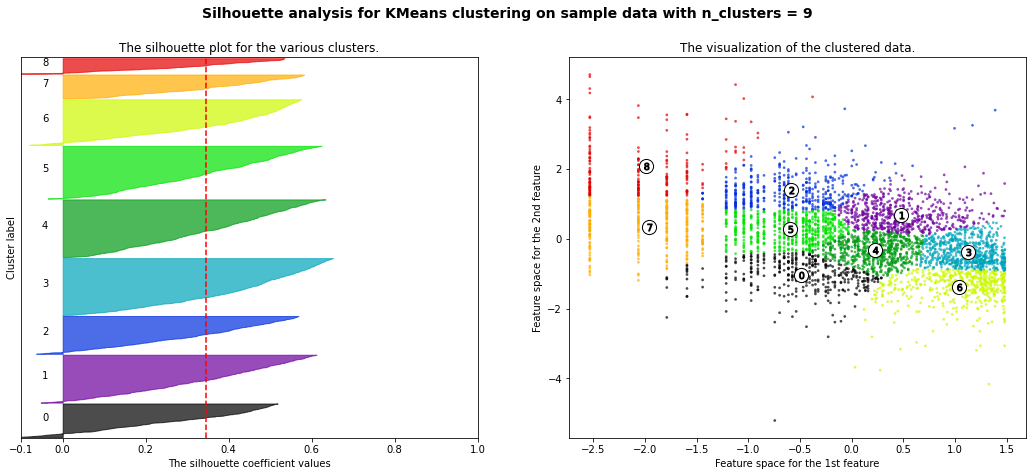

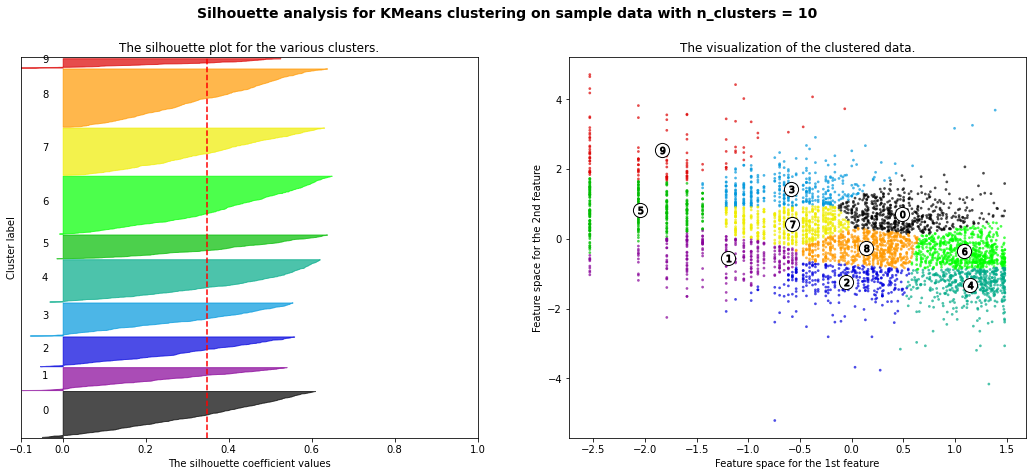

In [193]:

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


Customer Segmentation on basis of Recency, Monetary and Frequency



In [194]:
# Customer segmentation by taking k =2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


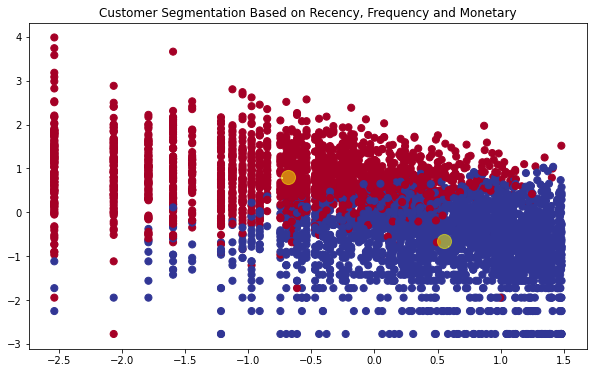

In [195]:
# Plot segmentation
plt.figure(figsize=(10,6))
plt.title('Customer Segmentation Based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c= y_kmeans, s=50, cmap = 'RdYlBu')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'yellow', s=200, alpha=0.5)



In [196]:
um_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_


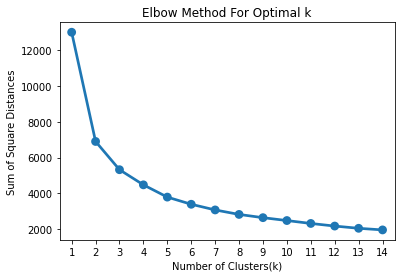

In [197]:
# Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [198]:
# Build clustering model
KMean_clust = KMeans(n_clusters = 2, init = 'k-means++', max_iter=1000)
KMean_clust.fit(X)


KMeans(max_iter=1000, n_clusters=2)

In [199]:
# Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(15)


,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score,Loyalty,Recency_log,Frequency_log,Monetry_log,Cluster
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,1
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,0
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,1
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676,0
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,1
12352.0,36,85,2506.04,2,2,1,221,5,Platinum,3.583519,4.442651,7.826459,0
12353.0,204,4,89.00,4,4,4,444,12,Bronz,5.318120,1.386294,4.488636,1
12354.0,232,58,1079.40,4,2,2,422,8,Gold,5.446737,4.060443,6.984161,1
12355.0,214,13,459.40,4,4,3,443,11,Bronz,5.365976,2.564949,6.129921,1


## <b>Dendogram

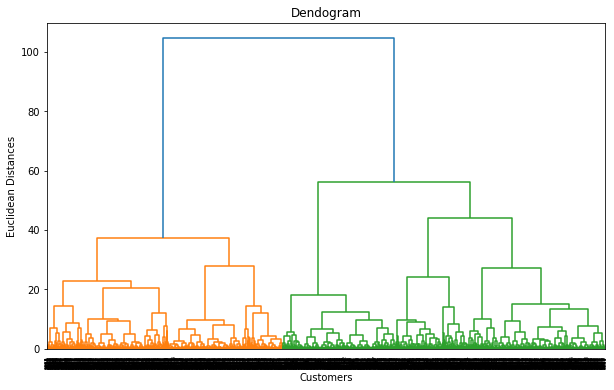

In [200]:
# plot the optimal number of cluster using Dendogram
# Find the largest vertical ditance we can make without crossing any other horizontal line
plt.figure(figsize=(10,6))
dendogram = sch.dendrogram(sch.linkage(X,method= 'ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

* The number of clusters will be the number of vertical lines which are being intersected by the liine drawn using the threshold = 90
* Number of cluster is 2

In [201]:
# Fitting the hierarchial clustering to the dataset
h_cluster = AgglomerativeClustering(n_clusters= 2, affinity= 'euclidean', linkage = 'ward')
y_h_cluster = h_cluster.fit_predict(X)


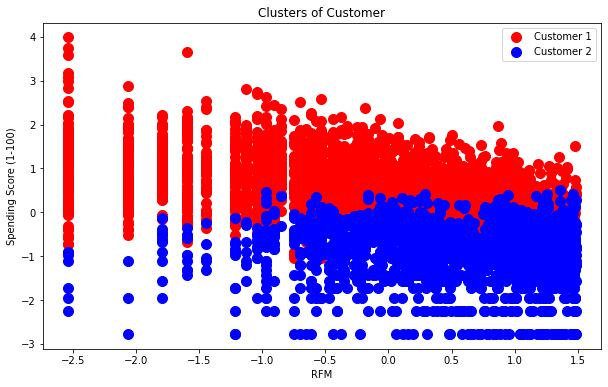

In [202]:
 # Visualizing clusters (2D only)
plt.figure(figsize=(10,6))
plt.scatter(X[y_h_cluster == 0, 0], X[y_h_cluster == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_h_cluster == 1, 0], X[y_h_cluster == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Conclusion: By applying different algorithm to our dataset,the optimal number of cluster is 2.

## Implementing DBSCAN to Recency, Frequency and Monetary

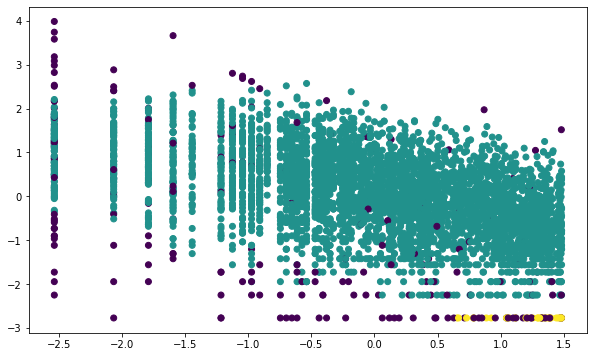

In [203]:
 # Applying DBSCAN on RFM
y_pred = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:,1], c=y_pred)


Conclusion: We can conclude by above plot that customers are well segmented by Recency, Frequency and Monetary. Also, the number of clusters is equal to 3.

In [204]:
rfm_df.head()

,Recency,Frequency,Monetry,R,F,M,RFM,RFM_Score,Loyalty,Recency_log,Frequency_log,Monetry_log,Cluster
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,1
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,0
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,1
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676,0
12350.0,310,17,334.40,4,4,3,443,11,Bronz,5.736572,2.833213,5.812338,1


In [205]:
data_process_normalized=rfm_df[['Recency','Frequency','Monetry','Recency_log','Frequency_log','Monetry_log','Loyalty','Cluster']]

In [206]:
data_process_normalized.groupby('Cluster').agg({'Recency' : ['mean', 'min', 'max'],
                                                                      'Frequency' : ['mean', 'min', 'max'],
                                                                      'Monetry' : ['mean', 'min', 'max']})

Recency            Frequency               Monetry          \
               mean min  max        mean min   max        mean     min   
Cluster                                                                  
0         30.989632   1  372  175.268533   1  7847  4033.08533  161.03   
1        140.922822   1  373   24.826141   1   157   469.53830    1.00   

                    
               max  
Cluster             
0        280206.02  
1         77183.60

# **Summary And Conclusion of project**


* ### ***Firstly we did clustering based on RFM analysis. We had 4 clusters/Segmentation of customers based on RFM score.***
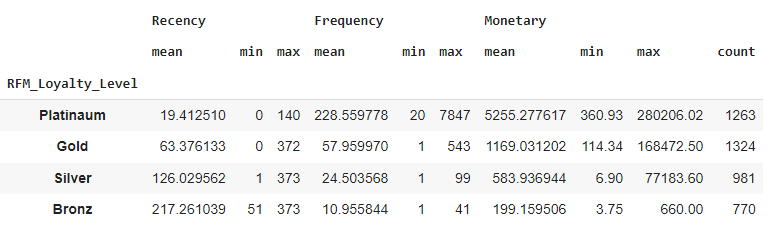

  * Platinum customers=1263 ( less recency but high  frequency and heavy spendings)
  * Gold customers=1324 (good recency,frequncy and moentary)
  * Silver customers=981(high recency, low frequency and low spendings)
  * Bronz customers=770 (very high recency but very less frequency and spendings)

* ### ***Later we implemented the machine learning algorithms to cluster the customers.***

* ***Above clustering is done with recency,frequency and monetary data(Kmeans Clustering) as all 3 together will provide more information.***

* ***Cluster 0 has high recency rate but very low frequency and monetary. Cluster 0 conatins 2414 customers.***
* ***Cluster 1 has low recency rate but they are frequent buyers and spends  very high money than other customers as mean monetary value is very high.Thus generates more revnue to the retail business***

## <b>Overall Conclusion <B>
Throughout the analysis we went through various steps to perform customer segmentation. We started with data wrangling in which we tried to handle null values, duplicates and performed feature modifications. Next, we did some exploratory data analysis and tried to draw observations from the features we had in the dataset.

Next, we formulated some quantitative factors such as recency, frequency and monetary known as rfm model for each of the customers. We implemented KMeans clustering algorithm on these features. We also performed silhouette and elbow method analysis to determine the optimal no. of clusters which was 2. We saw customers having high recency and low frequency and monetary values were part of one cluster and customers having low recency and high frequency, monetary values were part of another cluster.

However, there can be more modifications on this analysis. One may choose to cluster into more no. depending on company objectives and preferences. The labelled feature after clustering can be fed into classification supervised machine learning algorithms that could predict the classes for new set of observations. The clustering can also be performed on new set of features such as type of products each customer prefer to buy often, finding out customer lifetime value (clv), segmenting on the basis of time period they visit and much more.